# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)
conf_matrix = confusion_matrix(y_test, y_pred)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


In [33]:
classes = np.unique(y_test)
total_tp=0
total_tn=0
total_fp=0
total_fn=0
for cls in classes:
    tp = conf_matrix[cls, cls]
    total_tp += tp
    fp = conf_matrix[:, cls].sum() - tp
    total_fp += fp
    fn = conf_matrix[cls, :].sum() - tp
    total_fn += fn
    tn = conf_matrix.sum() - (tp + fp + fn)
    total_tn += tn

    print(f"Clase {cls}: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(total_tp, total_tn, total_fp, total_fn)

Clase 0: TP=33, TN=327, FP=0, FN=0
Clase 1: TP=28, TN=331, FP=1, FN=0
Clase 2: TP=33, TN=326, FP=1, FN=0
Clase 3: TP=33, TN=325, FP=1, FN=1
Clase 4: TP=45, TN=314, FP=0, FN=1
Clase 5: TP=44, TN=309, FP=4, FN=3
Clase 6: TP=34, TN=324, FP=1, FN=1
Clase 7: TP=33, TN=326, FP=0, FN=1
Clase 8: TP=29, TN=329, FP=1, FN=1
Clase 9: TP=38, TN=319, FP=1, FN=2
350 3230 10 10


In [22]:
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n")
print(report)

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [13]:
print(conf_matrix)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


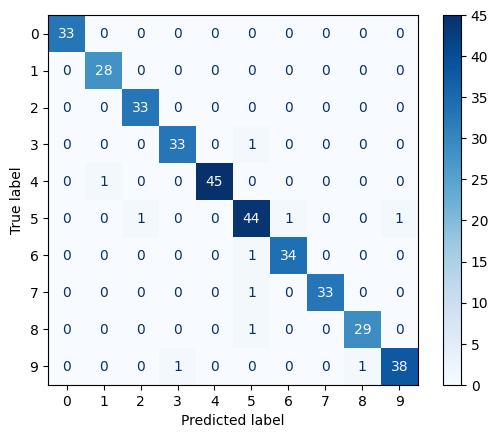

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### TAREA en clase/casa (reference - pumpkings homework):

Usando alguna herramienta de IA, consultar:

1. Qué es y cómo se obtiene la matriz de confusíón.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.
3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.
4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.

### Explicación de las Métricas

1. **Exactitud (Accuracy)**: Proporción de predicciones correctas entre el total de casos. Es una métrica global que indica la tasa general de aciertos del modelo.
   - Fórmula: $$ \text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN}\ $$

2. **Precisión (Precision)**: Proporción de verdaderos positivos entre todos los positivos predichos. Mide la exactitud de las predicciones positivas.
   - Fórmula: $$ \text{Precisión} = \frac{TP}{TP + FP}\ $$

3. **Sensibilidad (Recall)**: Proporción de verdaderos positivos entre todos los casos reales positivos. Mide la capacidad del modelo para identificar correctamente los positivos.
   - Fórmula: $$ \text{Sensibilidad} = \frac{TP}{TP + FN}\ $$

4. **Especificidad (Specificity)**: Proporción de verdaderos negativos entre todos los casos reales negativos. Indica la capacidad del modelo para identificar correctamente los negativos.
   - Fórmula: $$ \text{Especificidad} = \frac{TN}{TN + FP}\ $$

5. **Puntuación F1 (F1 Score)**: Media armónica de la precisión y la sensibilidad. Es útil cuando se necesita un equilibrio entre precisión y sensibilidad.
   - Fórmula: $$ \text{Puntuación F1} = 2 \cdot \frac{\text{Precisión} \cdot \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}}\ $$


In [2]:
# prompt:  [\text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN}] pon está ecuación en el markdown de colab para que el latex se vea bien

$$
\text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN}
$$


SyntaxError: invalid syntax (<ipython-input-2-62f72b75e485>, line 3)

## Formulas para el cálculo de las métricas de un modelo de clasificación

In [23]:
def matriz_confusion(y_true, y_pred):
    TP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == 1)
    TN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == 0)
    FP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
    FN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)
    return float(TP), float(TN), float(FP), float(FN)

def exactitud(TP, TN, FP, FN):
    total = TP + TN + FP + FN
    return (TP + TN) / total if total else 0.0

def precision(TP, FP):
    return TP / (TP + FP) if (TP + FP) else 0.0

def recall(TP, FN):
    return TP / (TP + FN) if (TP + FN) else 0.0

def puntuacion_f1(TP, FP, FN):
    prec = precision(TP, FP)
    sens = sensibilidad(TP, FN)
    return 2.0 * (prec * sens) / (prec + sens) if (prec + sens) else 0.0


def sensibilidad(TP, FN):
    return TP / (TP + FN) if (TP + FN) else 0.0

def especificidad(TN, FP):
    return TN / (TN + FP) if (TN + FP) else 0.0


In [34]:
# Calcular la matriz de confusión
TP, TN, FP, FN = matriz_confusion(y_test, y_pred)

# Calcular métricas
acc = exactitud(total_tp, total_tn, total_fp, total_fn)
prec = precision(total_tp, total_fp)
sens = sensibilidad(total_tp, total_fn)
spec = especificidad(total_tn, total_fp)
f1 = puntuacion_f1(total_tp, total_fp, total_fn)

print("Matriz de confusión:")
print(f"TP: {total_tp}")
print(f"TN: {total_tn}")
print(f"FP: {total_fp}")
print(f"FN: {total_fn}")

print(f"Exactitud (Accuracy): {acc:.2f}")
print(f"Precisión (Precision): {prec:.2f}")
print(f"Sensibilidad (Recall): {sens:.2f}")
print(f"Especificidad (Specificity): {spec:.2f}")
print(f"Puntuación F1 (F1 Score): {f1:.2f}")

Matriz de confusión:
TP: 350
TN: 3230
FP: 10
FN: 10
Exactitud (Accuracy): 0.99
Precisión (Precision): 0.97
Sensibilidad (Recall): 0.97
Especificidad (Specificity): 1.00
Puntuación F1 (F1 Score): 0.97


In [ ]:
# Exactitud: 0.9722222222222222
# Precisión: 0.9725599634194969
# Recuperación o sensibilidad (recall): 0.9722222222222222
# Puntuación o medida F1 (F1-score): 0.9722809227439473